In [1]:
import requests
import zipfile
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import japanize_matplotlib

In [2]:
TOKYO_ADMIN_PATH = 'data/nl/N03-20240101_13.geojson'

In [3]:
gdf_tokyo_admin = gpd.read_file(TOKYO_ADMIN_PATH)
gdf_tokyo_admin

,N03_001,N03_002,N03_003,N03_004,N03_005,N03_007,geometry
0,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.28925 30.48135, 140.28968 30.480..."
1,東京都,None,None,所属未定地,None,13000,"POLYGON ((139.82167 35.58322, 139.82187 35.583..."
2,東京都,None,None,所属未定地,None,13000,"POLYGON ((139.84130 35.64702, 139.84129 35.646..."
3,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.05004 31.43993, 140.05002 31.439..."
4,東京都,None,None,所属未定地,None,13000,"POLYGON ((140.34167 29.79385, 140.34174 29.793..."
...,...,...,...,...,...,...,...
6899,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.28634 24.79924, 141.28633 24.799..."
6900,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.29279 24.74890, 141.29278 24.748..."
6901,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.37959 24.78060, 141.37958 24.780..."
6902,東京都,None,None,小笠原村,None,13421,"POLYGON ((141.29002 24.74740, 141.29002 24.747..."


In [4]:
gdf_tokyo_admin_grouped = gdf_tokyo_admin.dissolve(by='N03_007')
gdf_tokyo_admin_grouped = gdf_tokyo_admin_grouped.reset_index()
gdf_tokyo_admin_grouped

,N03_007,geometry,N03_001,N03_002,N03_003,N03_004,N03_005
0,13000,"MULTIPOLYGON (((140.34167 29.79385, 140.34161 ...",東京都,None,None,所属未定地,None
1,13101,"POLYGON ((139.77287 35.70370, 139.77287 35.703...",東京都,None,None,千代田区,None
2,13102,"POLYGON ((139.78341 35.69645, 139.78334 35.696...",東京都,None,None,中央区,None
3,13103,"MULTIPOLYGON (((139.77115 35.62838, 139.77115 ...",東京都,None,None,港区,None
4,13104,"POLYGON ((139.73333 35.70770, 139.73321 35.707...",東京都,None,None,新宿区,None
...,...,...,...,...,...,...,...
58,13381,"MULTIPOLYGON (((139.38455 34.04434, 139.38458 ...",東京都,None,None,三宅村,None
59,13382,"MULTIPOLYGON (((139.29851 33.65146, 139.29837 ...",東京都,None,None,御蔵島村,None
60,13401,"MULTIPOLYGON (((139.83879 33.04832, 139.83878 ...",東京都,None,None,八丈町,None
61,13402,"MULTIPOLYGON (((139.76717 32.44306, 139.76718 ...",東京都,None,None,青ヶ島村,None


In [5]:
GTFS_URL = 'https://api-public.odpt.org/api/v4/files/Toei/data/ToeiBus-GTFS.zip'
ZIP_PATH = 'tmp.zip'
TMPDIR_PATH = 'tmp/'

In [6]:
response = requests.get(GTFS_URL)

if response.status_code == 200:
  with open(ZIP_PATH, 'wb') as f:
    f.write(response.content)

if not os.path.exists(TMPDIR_PATH):
  os.makedirs(TMPDIR_PATH)

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
  zip_ref.extractall(TMPDIR_PATH)

In [7]:
df_stops = pd.read_csv(TMPDIR_PATH + 'stops.txt')
df_stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code
0,0001-01,NaN,愛育クリニック前,NaN,35.653697,139.726017,0001-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
1,0001-02,NaN,愛育クリニック前,NaN,35.654095,139.726541,0001-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
2,0003-01,NaN,青戸車庫前,NaN,35.744787,139.843847,0003-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
3,0003-02,NaN,青戸車庫前,NaN,35.745259,139.844403,0003-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
4,0003-03,NaN,青戸車庫前,NaN,35.743838,139.843350,0003-03,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,2627-01,NaN,晴海五丁目ターミナル,NaN,35.652299,139.773363,2627-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
3718,2627-02,NaN,晴海五丁目ターミナル,NaN,35.652160,139.773195,2627-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
3719,2628-02,NaN,晴海ふ頭公園北,NaN,35.648823,139.771797,2628-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN
3720,2629-01,NaN,晴海ふ頭公園南,NaN,35.648287,139.772342,2629-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN


In [8]:
gdf_stops = gpd.GeoDataFrame(df_stops, geometry=gpd.points_from_xy(df_stops['stop_lon'], df_stops['stop_lat'], crs=4326))
gdf_stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code,geometry
0,0001-01,NaN,愛育クリニック前,NaN,35.653697,139.726017,0001-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.72602 35.65370)
1,0001-02,NaN,愛育クリニック前,NaN,35.654095,139.726541,0001-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.72654 35.65409)
2,0003-01,NaN,青戸車庫前,NaN,35.744787,139.843847,0003-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.84385 35.74479)
3,0003-02,NaN,青戸車庫前,NaN,35.745259,139.844403,0003-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.84440 35.74526)
4,0003-03,NaN,青戸車庫前,NaN,35.743838,139.843350,0003-03,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.84335 35.74384)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,2627-01,NaN,晴海五丁目ターミナル,NaN,35.652299,139.773363,2627-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.77336 35.65230)
3718,2627-02,NaN,晴海五丁目ターミナル,NaN,35.652160,139.773195,2627-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.77319 35.65216)
3719,2628-02,NaN,晴海ふ頭公園北,NaN,35.648823,139.771797,2628-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.77180 35.64882)
3720,2629-01,NaN,晴海ふ頭公園南,NaN,35.648287,139.772342,2629-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,NaN,NaN,NaN,POINT (139.77234 35.64829)


In [9]:
gdf_stops_admin = gdf_stops.sjoin(gdf_tokyo_admin_grouped, how='inner', predicate='within')
gdf_stops_admin

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,...,wheelchair_boarding,platform_code,geometry,index_right,N03_007,N03_001,N03_002,N03_003,N03_004,N03_005
0,0001-01,NaN,愛育クリニック前,NaN,35.653697,139.726017,0001-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.72602 35.65370),3,13103,東京都,None,None,港区,None
1,0001-02,NaN,愛育クリニック前,NaN,35.654095,139.726541,0001-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.72654 35.65409),3,13103,東京都,None,None,港区,None
2,0003-01,NaN,青戸車庫前,NaN,35.744787,139.843847,0003-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.84385 35.74479),22,13122,東京都,None,None,葛飾区,None
3,0003-02,NaN,青戸車庫前,NaN,35.745259,139.844403,0003-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.84440 35.74526),22,13122,東京都,None,None,葛飾区,None
4,0003-03,NaN,青戸車庫前,NaN,35.743838,139.843350,0003-03,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.84335 35.74384),22,13122,東京都,None,None,葛飾区,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,2627-01,NaN,晴海五丁目ターミナル,NaN,35.652299,139.773363,2627-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.77336 35.65230),2,13102,東京都,None,None,中央区,None
3718,2627-02,NaN,晴海五丁目ターミナル,NaN,35.652160,139.773195,2627-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.77319 35.65216),2,13102,東京都,None,None,中央区,None
3719,2628-02,NaN,晴海ふ頭公園北,NaN,35.648823,139.771797,2628-02,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.77180 35.64882),2,13102,東京都,None,None,中央区,None
3720,2629-01,NaN,晴海ふ頭公園南,NaN,35.648287,139.772342,2629-01,https://tobus.jp/blsys/navi?LCD=&VCD=cresultrs...,0,NaN,...,NaN,NaN,POINT (139.77234 35.64829),2,13102,東京都,None,None,中央区,None


In [10]:
df_stop_count = gdf_stops_admin.groupby('N03_007')[['stop_id']].count()
df_stop_count = df_stop_count.reset_index()
df_stop_count

,N03_007,stop_id
0,13101,106
1,13102,147
2,13103,282
3,13104,237
4,13105,186
5,13106,170
6,13107,203
7,13108,536
8,13109,108
9,13111,28


In [11]:
gdf_tokyo_stops = gdf_tokyo_admin_grouped.merge(df_stop_count)
gdf_tokyo_stops

,N03_007,geometry,N03_001,N03_002,N03_003,N03_004,N03_005,stop_id
0,13101,"POLYGON ((139.77287 35.70370, 139.77287 35.703...",東京都,None,None,千代田区,None,106
1,13102,"POLYGON ((139.78341 35.69645, 139.78334 35.696...",東京都,None,None,中央区,None,147
2,13103,"MULTIPOLYGON (((139.77115 35.62838, 139.77115 ...",東京都,None,None,港区,None,282
3,13104,"POLYGON ((139.73333 35.70770, 139.73321 35.707...",東京都,None,None,新宿区,None,237
4,13105,"POLYGON ((139.75000 35.73338, 139.75000 35.733...",東京都,None,None,文京区,None,186
5,13106,"POLYGON ((139.76667 35.71330, 139.76667 35.713...",東京都,None,None,台東区,None,170
6,13107,"POLYGON ((139.79517 35.70466, 139.79500 35.704...",東京都,None,None,墨田区,None,203
7,13108,"MULTIPOLYGON (((139.79859 35.59561, 139.79861 ...",東京都,None,None,江東区,None,536
8,13109,"MULTIPOLYGON (((139.74949 35.59155, 139.74951 ...",東京都,None,None,品川区,None,108
9,13111,"MULTIPOLYGON (((139.80834 35.53221, 139.80960 ...",東京都,None,None,大田区,None,28


In [12]:
gdf_tokyo_stops.sort_values('stop_id', ascending=False)

,N03_007,geometry,N03_001,N03_002,N03_003,N03_004,N03_005,stop_id
7,13108,"MULTIPOLYGON (((139.79859 35.59561, 139.79861 ...",東京都,None,None,江東区,None,536
21,13123,"MULTIPOLYGON (((139.87146 35.63864, 139.87073 ...",東京都,None,None,江戸川区,None,441
2,13103,"MULTIPOLYGON (((139.77115 35.62838, 139.77115 ...",東京都,None,None,港区,None,282
22,13205,"POLYGON ((139.29710 35.75751, 139.29716 35.757...",東京都,None,None,青梅市,None,248
19,13121,"POLYGON ((139.81650 35.75000, 139.81650 35.750...",東京都,None,None,足立区,None,244
3,13104,"POLYGON ((139.73333 35.70770, 139.73321 35.707...",東京都,None,None,新宿区,None,237
6,13107,"POLYGON ((139.79517 35.70466, 139.79500 35.704...",東京都,None,None,墨田区,None,203
4,13105,"POLYGON ((139.75000 35.73338, 139.75000 35.733...",東京都,None,None,文京区,None,186
5,13106,"POLYGON ((139.76667 35.71330, 139.76667 35.713...",東京都,None,None,台東区,None,170
1,13102,"POLYGON ((139.78341 35.69645, 139.78334 35.696...",東京都,None,None,中央区,None,147


<Axes: >

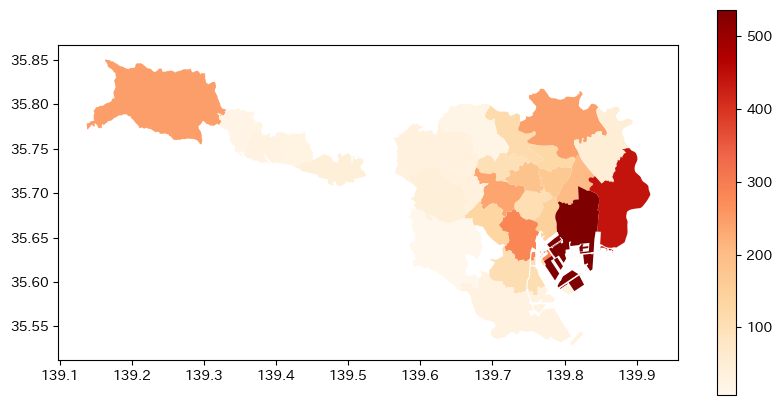

In [13]:
gdf_tokyo_stops.plot(column='stop_id', cmap='OrRd', figsize=(10, 5), legend=True)